# SVM Model Testing

In [1]:
from PIL import Image, ImageOps
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import pandas as pd
import os

from numpy.random import default_rng
rng = default_rng()

### Import dataset

In [2]:
images = []
labels = []
reshp = lambda image : cv.resize(image,(250,250))
for f in glob.iglob("/home/dmarq/school/CSE120/dataset/flat/good/*"):
    im = np.asarray(ImageOps.grayscale(Image.open(f)))
#     for _ in range(20):
#         M = np.float32([[1, 0, rng.standard_normal(1)[0]*400],
#                     [0, 1, rng.standard_normal(1)[0]*400]])
#         (h, w) = im.shape[:2]
#         shifted = cv.warpAffine(im, M, (w, h))
    im = reshp(im)
    images.append(im)
    labels.append(1)
        
for f in glob.iglob("/home/dmarq/school/CSE120/dataset/flat/bad/*"):
    im = np.asarray(ImageOps.grayscale(Image.open(f)))
#     for _ in range(20):
#         M = np.float32([[1, 0, rng.standard_normal(1)[0]*400],
#                     [0, 1, rng.standard_normal(1)[0]*400]])
#         (h, w) = im.shape[:2]
#         shifted = cv.warpAffine(im, M, (w, h))
    im = reshp(im)
    images.append(im)
    labels.append(0)
    
images = np.array(images)
labels = np.array(labels)

KeyboardInterrupt: 

In [ ]:
print("{} images".format(len(images)))
print("Image shape {}".format(images.shape))

### Example Good and Bad Part

In [ ]:
num = 0
plt.imshow(images[num],cmap='gray')
print("class {}".format(labels[num]))

In [ ]:
num = 6
plt.imshow(images[num],cmap='gray')
print("class {}".format(labels[num]))

## import model libraries

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import pickle

### training and testing split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.45)
print("Train shape {}".format(X_train.shape))
print("Test shape {}".format(X_test.shape))

### data pipeline

In [ ]:
flatten = lambda batch : batch.reshape(batch.shape[0],-1)

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),('pca', PCA(n_components=40,svd_solver="full")), ('svc', SVC())])

In [ ]:
pipe.fit(flatten(X_train),y_train)

In [ ]:
# load pipeline
with open('../model.pkl','rb') as file:
    pipe = pickle.load(file)

In [ ]:
# save pipeline
#with open('../model.pkl','wb') as file:
#    pickle.dump(pipe,file)

In [ ]:
# training set
pipe.score(flatten(X_train),y_train)

In [ ]:
# testing set
pipe.score(flatten(X_test),y_test)

In [ ]:
conf = np.zeros((2,2))
for i,im in enumerate(X_test):
    conf[y_test[i],pipe.predict([X_test[i].reshape(-1)])[0]] += 1
sns.heatmap(conf, annot=True, fmt="", cbar=False, square=True)
plt.ylabel('truth')
plt.xlabel('prediction')

In [ ]:
count = 0
for i, v in enumerate(pipe.predict(X_test.reshape(X_test.shape[0],-1))==y_test):
    if v==False and count < 5:
        count += 1
        plt.imshow(images[i],cmap='gray')
        plt.title("truth {} prediction {}".format(y_test[i],pipe.predict([X_test[i].reshape(-1)])[0]))
        plt.show()

### inverse transform visualization

In [ ]:
test1 = X_train[0:1]
test2 = pipe[0].inverse_transform(pipe[1].inverse_transform(pipe[1].transform(pipe[0].transform(X_train[0:1].reshape(1,-1))))).reshape(1,250,250)

In [ ]:
plt.imshow(test1[0],cmap='gray')
plt.title('original')
plt.show()
plt.imshow(test2[0],cmap='gray')
plt.title('inverse transform')
plt.show()

### Accuracy vs. Number of Principal Components

In [ ]:
for i in range(10,101,10):
    p = Pipeline([('scaler', StandardScaler()),('pca', PCA(n_components=i,svd_solver="full")), ('svc', SVC())])
    p.fit(X_train.reshape(X_train.shape[0],-1),y_train)
    plt.scatter(x=p[1].components_.shape[0],y=p.score(X_test.reshape(X_test.shape[0],-1),y_test),color='blue')
plt.xlabel('number of principal components')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# example of pipeline useage for API

In [ ]:
import Pipeline as p

In [ ]:
clf = p.Pipeline()

In [ ]:
clf.classify(X_train[0:1])

# OpenCV model

In [1]:
from PIL import Image, ImageOps
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import pandas as pd
import os

In [2]:
reshp = lambda image : cv.resize(image,(250,250))
images = {"top":[],"right":[],"left":[],"front":[],"back":[]}
for key in images:
    for f in glob.iglob("../dataset/reference/bad/{}/*".format(key)):
        im = np.asarray(ImageOps.grayscale(Image.open(f)))
        im = reshp(im)
        images[key].append(im)

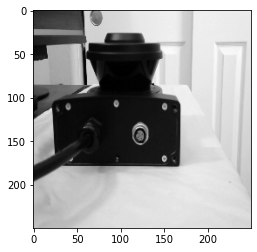

In [3]:
plt.imshow(images['back'][10],cmap='gray')

In [4]:
from HamPipeline import Pipeline

In [5]:
a = Pipeline()

In [6]:
a.get_thresh("left")
a.get_thresh("right")
a.get_thresh("back")
a.get_thresh("front")

(18.788512396694216, 6.047826117346583)

In [7]:
a.thresholds

{'left': (16.82223140495868, 5.347255779597739),
 'right': (18.00145124716553, 5.211317313204525),
 'back': (15.945124716553291, 4.71509139790261),
 'front': (18.788512396694216, 6.047826117346583)}

## Performance on Bad Parts

In [8]:
a.classify(images['left'],"left")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [9]:
print(a.classify(images['back'],"back"))

[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [10]:
a.classify(images['front'],"front")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## Performance on Good Parts

In [11]:
a.classify(a.get_ref('left'),"left")

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [12]:
a.classify(a.get_ref('back'),"back")

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [13]:
a.classify(a.get_ref('front'),"front")

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

## Threshold Testing

In [14]:
#a.thresholds['back']

In [15]:
#[a.score(im,"back") for im in np.array(images['back'])]

### Distribution

In [16]:
ori = "back"
res1 = [a.score(im,ori) for im in np.array(images[ori])]
res2 = [a.score(im,ori) for im in np.array(a.get_ref(ori))]

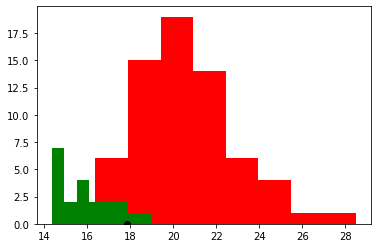

In [17]:
thresh = .4
plt.hist(list(map(lambda x: x[0] ,res1)),bins=8,color='red')
plt.hist(list(map(lambda x: x[0] ,res2)),bins=8,color='green')
plt.scatter(a.thresholds[ori][0] + thresh*a.thresholds[ori][1],0,color='black')
plt.show()